In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
def load_dataset(folder_path):
    images = []
    labels = []
    class_labels = {}
    class_count = 0

    for class_name in os.listdir(folder_path):
        class_labels[class_count] = class_name
        class_folder = os.path.join(folder_path, class_name)

        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (224, 224))  
            images.append(img)
            labels.append(class_count)

        class_count += 1

    return np.array(images), np.array(labels), class_labels

In [3]:
dataset_folder =r"C:\Users\Jeevesh Narayan\jeevesh_bcs1\Bollywood_celeb_face_localized"
images, labels, class_labels = load_dataset(dataset_folder)

In [4]:
images = images / 255.0

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_labels), activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rescale=1./255,            
    shear_range=0.2,            
    zoom_range=0.2,             
    horizontal_flip=True        
)


train_generator = datagen.flow_from_directory(
    r"C:\Users\Jeevesh Narayan\jeevesh_bcs1\Bollywood_celeb_face_localized",
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)


validation_generator = datagen.flow_from_directory(
    r"C:\Users\Jeevesh Narayan\jeevesh_bcs1\Bollywood_celeb_face_localized",
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)


Found 8664 images belonging to 100 classes.
Found 0 images belonging to 100 classes.


In [17]:
#training the model

In [13]:
epochs = 10  

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


Epoch 1/10


271/271 [==============================] - 183s 669ms/step - loss: 4.5942 - accuracy: 0.0188
Epoch 2/10
271/271 [==============================] - 172s 633ms/step - loss: 4.2696 - accuracy: 0.0336
Epoch 3/10
271/271 [==============================] - 173s 637ms/step - loss: 3.9348 - accuracy: 0.0688
Epoch 4/10
271/271 [==============================] - 172s 634ms/step - loss: 3.7116 - accuracy: 0.1101
Epoch 5/10
271/271 [==============================] - 170s 625ms/step - loss: 3.4551 - accuracy: 0.1577
Epoch 6/10
271/271 [==============================] - 171s 628ms/step - loss: 3.2415 - accuracy: 0.2029
Epoch 7/10
271/271 [==============================] - 174s 643ms/step - loss: 3.0456 - accuracy: 0.2372
Epoch 8/10
271/271 [==============================] - 174s 640ms/step - loss: 2.8720 - accuracy: 0.2804
Epoch 9/10
271/271 [==============================] - 175s 645ms/step - loss: 2.7233 - accuracy: 0.3156
Epoch 10/10
271/271 [==============================] - 169s 62

In [14]:
model.save("celebrity_face_recognition_model.h5")

C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
import matplotlib.pyplot as plt
def predict_celebrity(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0) / 255.0
    loaded_model = tf.keras.models.load_model("celebrity_face_recognition_model.h5")
    prediction = loaded_model.predict(img)
    predicted_class = np.argmax(prediction)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title("Input Image")
    plt.axis('off')
    plt.show()
    predicted_class_folder = os.path.join(r"C:\Users\Jeevesh Narayan\jeevesh_bcs1\Bollywood_celeb_face_localized", class_labels[predicted_class])
    if os.path.exists(predicted_class_folder):
        predicted_image_file = next(iter(os.listdir(predicted_class_folder)), None)
        if predicted_image_file:
            predicted_image_path = os.path.join(predicted_class_folder, predicted_image_file)
            predicted_img = cv2.imread(predicted_image_path)
            if predicted_img is not None:
                plt.imshow(cv2.cvtColor(predicted_img, cv2.COLOR_BGR2RGB))
                plt.title(f"Predicted Celebrity: {class_labels[predicted_class]}")
                plt.axis('off')
                plt.show()
            else:
                print(f"Error: Unable to read the predicted celebrity image at {predicted_image_path}.")
        else:
            print(f"Warning: The predicted celebrity class folder '{predicted_class_folder}' is empty.")
    else:
        print(f"Warning: Could not find the predicted celebrity class folder at {predicted_class_folder}")

1/1 [==============================] - 0s 92ms/step


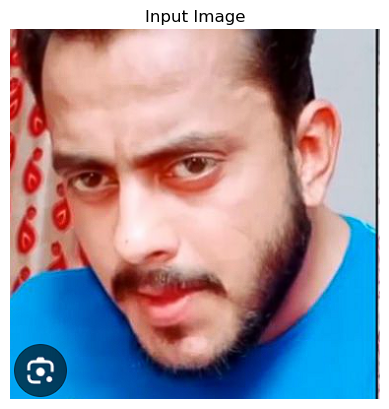

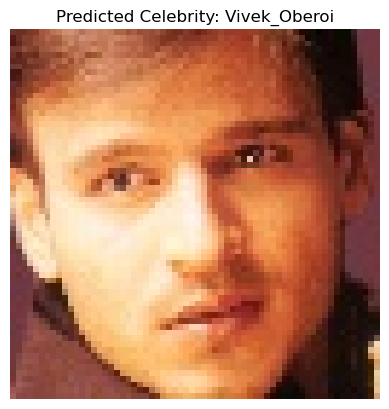

In [19]:
new_image_path =r"C:\Users\Jeevesh Narayan\Pictures\Screenshots\Screenshot 2024-01-07 231505.png"
predict_celebrity(new_image_path)